<link rel="preconnect" href="https://fonts.googleapis.com">
<link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
<link href="https://fonts.googleapis.com/css2?family=Amatic+SC:wght@400;700&display=swap" rel="stylesheet">
<link href="https://fonts.googleapis.com/css2?family=Pacifico&display=swap" rel="stylesheet">
<style>
    p {
        font-family: 'Pacifico', cursive;
    }
</style>

<h1 style="text-align:center;font-family: 'Amatic SC', cursive;">Univariate Linear Regression on the Scikit-Learn Diabetes Dataset</h1>
<h2 style="text-align:center;font-family: 'Amatic SC', cursive;">Waseem Raja Shaik</h2>
<h2 style="text-align:center;font-family: 'Amatic SC', cursive;">Student Id - 8894805</h2>

<p style="text-align:center;font-size:18px;font-family: 'Pacifico', cursive;"><b>In the context of data analysis, the term "univariate" refers to having only one feature or variable available for analysis. In the case of univariate linear regression, it is commonly used to examine the connection between a sole independent variable (x) and a dependent variable (y). A practical example of this would be predicting an individual's weight (y) based on their height (x).</b></p>

<h2 style="text-align:center;font-family: 'Pacifico', cursive;">Imported Libraries like</h2>
<img src="https://numpy.org/doc/stable/_static/numpylogo.svg" style="background-color:white;padding:10px;" width="500">
<br/>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/1200px-Scikit_learn_logo_small.svg.png" style="background-color:white;padding:10px;" width="500">
<br/>
<img src="https://matplotlib.org/3.1.0/_images/sphx_glr_logos2_003.png" style="background-color:white;padding:10px;" width="500">



In [2]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use("tableau-colorblind10")


<h2 style="text-align:center;font-family: 'Pacifico', cursive;">Loading Data from Scikit Learn</h2>
<h3 style="font-family: 'Pacifico', cursive;">Diabetes dataset (only independent variable's set)</h3>

In [7]:
# loading data
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True) 
diabetes_X_view = pd.DataFrame(diabetes_X)
diabetes_X_view.columns = ["age", "sex", "bmi", "abp", "s1_tc", "s2_ldl", "s3_hdl","s4_tch","s5_ltg","s6_glu"]
diabetes_X_view

,age,sex,bmi,abp,s1_tc,s2_ldl,s3_hdl,s4_tch,s5_ltg,s6_glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


<h3 style="font-family: 'Pacifico', cursive;">Diabetes dataset (only dependent variable set)</h3>

In [9]:
diabetes_y_view = pd.DataFrame(diabetes_y)
diabetes_y_view.columns = ["Disease Progression"]
diabetes_y_view

,Disease Progression
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


<h3 style="font-family: 'Pacifico', cursive;">Diabetes dataset taking on BMI data</h3>

In [12]:
diabetes_bmi = diabetes_X[:,2].reshape((-1,1))
diabetes_bmi_view = pd.DataFrame(diabetes_bmi)
diabetes_bmi_view.columns = ["bmi"]
diabetes_bmi_view

,bmi
0,0.061696
1,-0.051474
2,0.044451
3,-0.011595
4,-0.036385
...,...
437,0.019662
438,-0.015906
439,-0.015906
440,0.039062


<h2 style="text-align:center;font-family: 'Pacifico', cursive;">Splitting data into Training and Testing</h2>
<p style="font-family: 'Pacifico', cursive;">80% data for Training purpose and 20% data for Testing Purpose</p>

<h3 style="font-family: 'Pacifico', cursive;">Below is Training data for BMI and Disease progression</h3>

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(diabetes_bmi, diabetes_y, test_size=0.2, random_state=0)
X_y_train_view = pd.DataFrame({'train bmi': X_train.flatten(), 'train disease': y_train})
X_y_train_view.columns = ["Training Data Bmi","Training Data disease progression"]
X_y_train_view

,Training Data Bmi,Training Data disease progression
0,0.002417,85.0
1,-0.077342,137.0
2,-0.035307,53.0
3,0.001339,51.0
4,0.020739,197.0
...,...,...
348,-0.007284,248.0
349,-0.030996,91.0
350,-0.021295,281.0
351,-0.073030,142.0


<h3 style="font-family: 'Pacifico', cursive;">Below is Testing data for BMI and Disease progression</h3>

In [32]:
X_y_test_view = pd.DataFrame({'Test bmi': X_test.flatten(), 'Test disease': y_test})
X_y_test_view.columns = ["Testing Data Bmi","Testing Data disease progression"]
X_y_test_view

,Testing Data Bmi,Testing Data disease progression
0,0.104809,321.0
1,0.060618,215.0
2,0.008883,127.0
3,-0.023451,64.0
4,0.045529,175.0
...,...,...
84,-0.089197,104.0
85,-0.070875,49.0
86,0.043373,103.0
87,0.014272,142.0


<p style="font-family: 'Pacifico', cursive;">Using Scikit learn - linear model which has Linear Regression function - we run function and provide to fit the training data of bmi and disease progression</p>

In [35]:
# Train the model
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

<h3 style="font-family: 'Pacifico', cursive;">They are two ways to get predicated disease progression data based on bmi test data</h3>
<p style="font-family: 'Pacifico', cursive;">First - "using y = mx + c where m is model.coef_ and c is model.intercept_"</p>

In [40]:
# Make predictions using the testing set
y_pred =  model.coef_ * X_test + model.intercept_
print('Coefficients: \n', model.coef_)
print('Intercept: \n', model.intercept_)
y_pred_view = pd.DataFrame({'disease progression': y_pred.flatten()})
y_pred_view.columns = ["Predicated Data disease progression"]
y_pred_view

Coefficients: 
 [981.65543614]
Intercept: 
 152.28824927379569


,Predicated Data disease progression
0,255.174269
1,211.794626
2,161.008702
3,129.267499
4,196.982065
...,...
84,64.727054
85,82.713736
86,194.865984
87,166.298902


<p style="font-family: 'Pacifico', cursive;">Second - "use scikit learn predefined function like linearRegression.predict"</p>

In [39]:
# Make predictions using the testing set
y_pred =  model.predict(X_test)
y_pred_view = pd.DataFrame({'disease progression': y_pred.flatten()})
y_pred_view.columns = ["Predicated Data disease progression"]
y_pred_view

,Predicated Data disease progression
0,255.174269
1,211.794626
2,161.008702
3,129.267499
4,196.982065
...,...
84,64.727054
85,82.713736
86,194.865984
87,166.298902


In [116]:
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

Mean squared error: 4150.68


<h2 style="text-align:center;font-family: 'Pacifico', cursive;">Train data: Disease Progression vs BMI</h2>

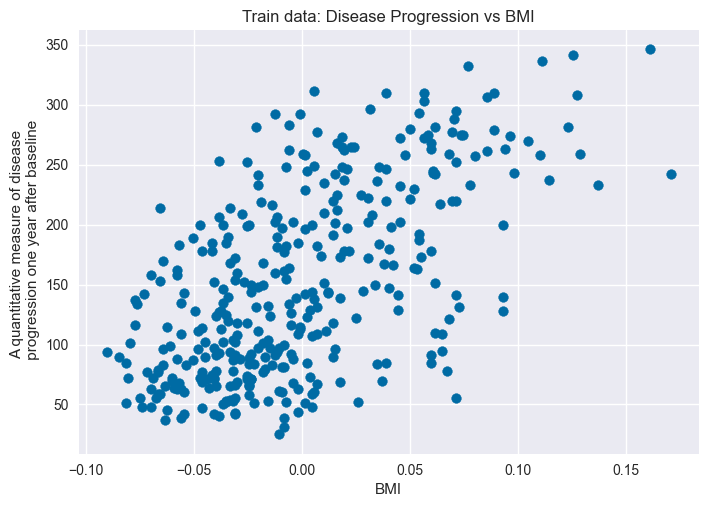

In [117]:
# Plot outputs
plt.title("Train data: Disease Progression vs BMI")
plt.xlabel("BMI")
plt.ylabel("A quantitative measure of disease \n progression one year after baseline")
plt.scatter(X_train, y_train)
plt.show()

<h2 style="text-align:center;font-family: 'Pacifico', cursive;">Test data: Disease Progression vs BMI</h2>


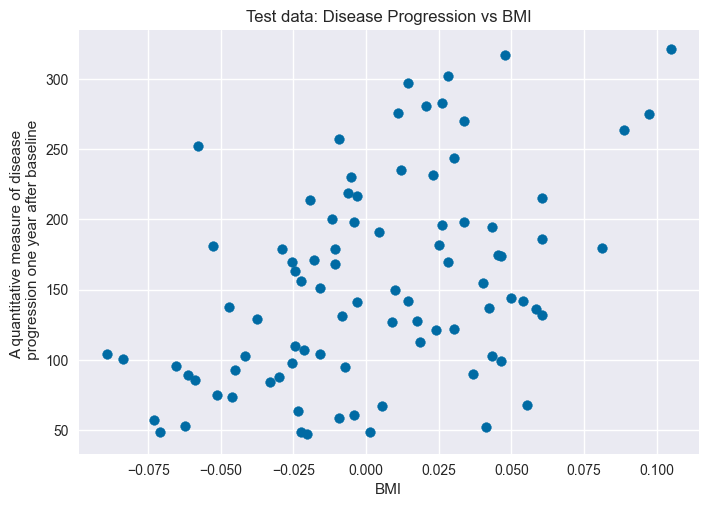

In [118]:
plt.title("Test data: Disease Progression vs BMI")
plt.xlabel("BMI")
plt.ylabel("A quantitative measure of disease \n progression one year after baseline")
plt.scatter(X_test, y_test)
plt.show()

<h2 style="text-align:center;font-family: 'Pacifico', cursive;">Slope line for predicated data of Disease Progression vs BMI</h2>


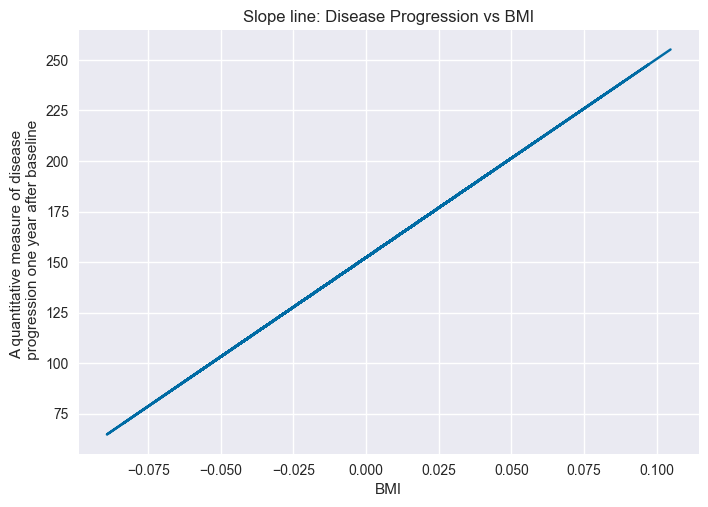

In [119]:
plt.title("Slope line: Disease Progression vs BMI")
plt.xlabel("BMI")
plt.ylabel("A quantitative measure of disease \n progression one year after baseline")
plt.plot(X_test, y_pred)
plt.show()

<h2 style="text-align:center;font-family: 'Pacifico', cursive;">Whole models combined: Disease Progression vs BMI</h2>

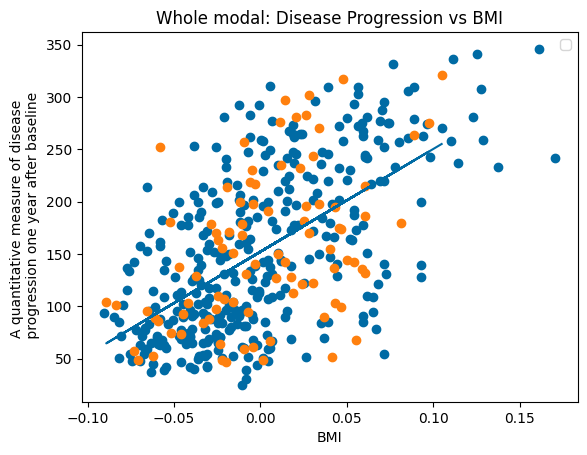

In [45]:
plt.title("Whole modal: Disease Progression vs BMI")
plt.xlabel("BMI")
plt.ylabel("A quantitative measure of disease \n progression one year after baseline")
plt.legend(["Training Data","Testing Data","Predicated Slope"])
plt.scatter(X_train, y_train, label="Training Data")
plt.scatter(X_test, y_test, label="Testing Data")
plt.plot(X_test, y_pred, label="Predicated Slope")
plt.show()

<p style="font-family: 'Pacifico', cursive;">Univariate Linear Regression always been to refer one independent variable to one dependent variable. It is make it easy to compare them</p>